# Image Classification with MLP Networks
# Preliminaries
In this notebook I present a method to classify images from two datasets (Intel and Cifar10) using MLP neural networks.
The neural networks that would be presented would have both convolutional and dense layers.
The convolutional layers purpose is not only to preprocess the image input in order to extract feature maps but to make the network robust to classfication,thus 
could be able to classify the object represented in image in any pixel-wise position it could be rendered.
# Approach
This approach is strictly on research basis thus I use pytorch framework to create the networks and I am focusing on different architecures,optimizers,training types(mini-batch training - online training), learning rates in order to end-up to best fit models using a grid-search algorithm with cross-validation(I could use keras-tuner that would be much easier to implement but
I don't know how well it works with pytorch models). 
# Dataset
Last but not least I selected two datasets in order to test if a pretrained model could be migrated and get good in classifying other type of images.
So, I used cifar10 for training and then I tested it both on Cifar and Intel Image Classification Dataset that I downloaded from Kaggle.
# Disclaimers
- The time that I had was quite limited because I am in a period that I looking for thesis undertaking.(Edit undertook thesis and working on it)
- Pytorch on python3.11 is not even ported today so conda env with python3.8 was used and I lost some time searching if there is any possible way that I could fix this issue. 

Get ssl-certificate for jupyter-notebook connection enstablishment

In [2]:
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

Install dependencies

In [3]:
pip install -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


## First Things First - Loading the Datasets
This was part of the code was written during preliminary task on knn and ncc


In [4]:
import sys
sys.path.append('../utils')
from data_loader_CIFAR import load_cifar10_iterators,imshow
from data_loader_Intel import load_Intel 

#Load the CIFAR10 dataset
loaders_cifar = load_cifar10_iterators()
train_loader = loaders_cifar[0]
test_loader = loaders_cifar[1]
val_loader = loaders_cifar[2]
# Cifar Classes
classes_cifar = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# lOAD INTEL DATASET
X_train,Y_train,X_test,Y_test,X_check,Y_check = load_Intel()
# Intel Classes
classes_intel = ('buildings', 'forest', 'glacier', 'mountain', 'sea', 'street')

Files already downloaded and verified
Files already downloaded and verified
For training data , found 0 in folder seg_train
For training data , found 0 in folder seg_test
For training data , found 0 in folder seg_pred


Check If data is imported correctly

CIFAR10
images.shape: torch.Size([32, 3, 32, 32])
classes.shape torch.Size([32])


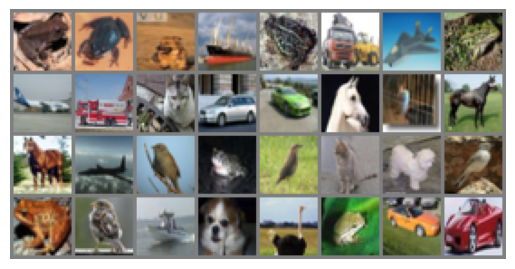

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Intel Dataset


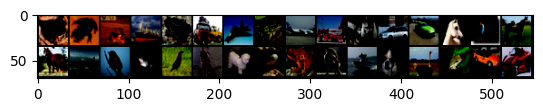

In [10]:
import matplotlib.pyplot as plt
import torchvision.utils
print("CIFAR10")
for images,classes in train_loader:
    print('images.shape:', images.shape)
    print('classes.shape', classes.shape)
    plt.axis('off')
    # without normalization
    imshow(torchvision.utils.make_grid(images,n_row=8))
    plt.figure(2)
    #with normalization
    plt.imshow(torchvision.utils.make_grid(images,nrow=16).permute((1,2,0)))
    break
# The same goes for Intel dataset
print("Intel Dataset")
for images,classes in zip(X_train,Y_train):
    
    plt.imshow(images[1:32,1:32,:])

## Fisrt is trained a 7-layer MLP simple yet with multiple architecures and tweaks for images
* The first four layers that the consist the network are convolutional layers followed by maxpooling layers. Convoluational layers
  are basically like applying filters to the image and get the input from regions of the image. Pooling is required to down sample the detection of features in feature maps.
  The whole purpose of this process is to make the classification independent from where the object that is classified is located in the image. 
* After these 4 layers follow 3 dense layers the first get the vectorized input from feature maps and passes it down to lower and lower dimensions in order the last layer to be able using the softmax activation function output the probabilities of class correspondance of the input image.
* Reguarding convolutional layers the model 1 has input of 3 channels(RGB of the image) and outputs to 6 features maps and then from 6 feature maps we got 16 using always kenrel size 5. The increment in channels is done to look more for the feature-details of each image and not compress it.
* These values were proposed in bibliography as good starting values for the first two convolutions.

In [6]:
from model1 import SmallMLP


# Evaluate Model

In [7]:
from evaluate import eval_model
# Load the model that was previously traineds
# model = torch.load('model.pt')
eval_model(test_loader, model)

ImportError: cannot import name 'accuracy' from 'utils' (unknown location)

# Second we test an equivalent model with batch normalization layer


In [ ]:
from model2 import NetworkBatchNorm


# Lastly we test a Dense layer to see how it operates with images

In [ ]:
from model3 import DenseMLP